# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:
df = pd.read_csv("tmdb_5000_movies TMDL 2024.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

The columns that have null values are the ones with a Non-Null count of lower than 4803. We could plug in the missing values by either searching them up on a search engine or by means of data imputation using the median or mode.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [4]:
df = df[["title","overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [5]:
df = df.dropna() # drop na values
df = df.reset_index(drop = True) # reset index
df

,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4796,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[]


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [6]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(df.loc[index, "genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"],unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 19201.30it/s]


In [8]:
df["proc_genres"]

0            Action
1           Fantasy
2            Action
3          Thriller
4         Adventure
           ...     
4795          Crime
4796         Comedy
4797       TV Movie
4798        Unknown
4799    Documentary
Name: proc_genres, Length: 4800, dtype: object

In [ ]:
unique_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'Unknown',
 'War',
 'Western']

Verify that one-hot encodings are indeed as expected

In [9]:
df["one_hot_genres"]

0       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4795    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4796    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
Name: one_hot_genres, Length: 4800, dtype: object

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

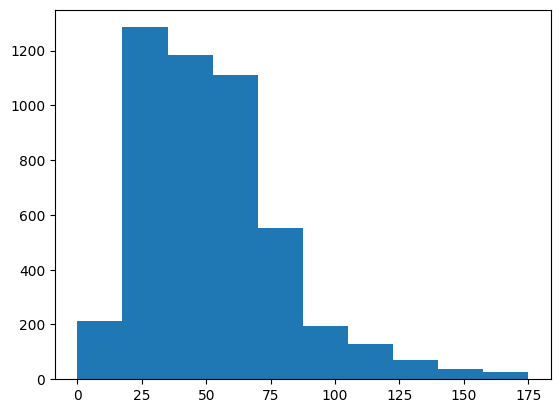

In [10]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
  processed_overviews.append(remove_punctuation(row["overview"].lower()))

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for index, row in df.iterrows():
  overview_lens.append(len(row["proc_overview"].split()))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(df["overview_len"])
plt.show()

In [11]:
df["proc_overview"]

0       in the 22nd century a paraplegic marine is dis...
1       captain barbossa long believed to be dead has ...
2       a cryptic message from bonds past sends him on...
3       following the death of district attorney harve...
4       john carter is a warweary former military capt...
                              ...                        
4795    el mariachi just wants to play his guitar and ...
4796    a newlywed couples honeymoon is upended by the...
4797    signed sealed delivered introduces a dedicated...
4798    when ambitious new york attorney sam is sent t...
4799    ever since the second grade when he first saw ...
Name: proc_overview, Length: 4800, dtype: object

In [12]:
df['overview_len']

0       28
1       34
2       41
3       65
4       55
        ..
4795    62
4796    13
4797    73
4798    65
4799    62
Name: overview_len, Length: 4800, dtype: int64

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [13]:
print(df['overview_len'].min())
print(df['overview_len'].max())

0
175


The shortest overview consists of 0 words and the longest of 175 words.
The overviews that are within the first bin, so probably < 20 words.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [14]:
df[df["overview_len"] >= 15]

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


In [15]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
first_tokenlen_words = []
for index, row in df.iterrows():
  first_tokenlen_words.append(" ".join(row["proc_overview"].split()[:token_len]))

df["proc_overview"] = first_tokenlen_words

# print to verify
df

<ipython-input-15-1287d935ff05>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = first_tokenlen_words


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


In [16]:
df["proc_overview"][0]

'in the 22nd century a paraplegic marine is dispatched to the moon pandora on a'

### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [88]:
# hint: store all words for all movies in a set, change it to a list and sort


# first collect all words
words = []
for index, row in df.iterrows():
  words.extend(row["proc_overview"].split())

# then obtain the unique words by storing them in a set
# and subsequently change it back to a list and sort
vocab = sorted(list(set(words))) # now we have our vocabulary

vocab_len = len(vocab)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [97]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"].split():
        sentence_encode.append(encode_labels(word, vocab)) # get encoding for this word
    sentence_encode = np.sum(sentence_encode, axis = 0) # sum over axis=0
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:14<00:00, 314.80it/s]
<ipython-input-97-2cf32276f850>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["one_hot_overview"] = encoded_labels


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4794    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

We have a 2-dimensional array of 4707 * 12493, i.e. 4707 vectors consisting of a vector of 12493 floats, which takes up a memory storage of 4707 * 12493 * 16 bytes = 940.872.816 bytes

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

(4707, 12493)


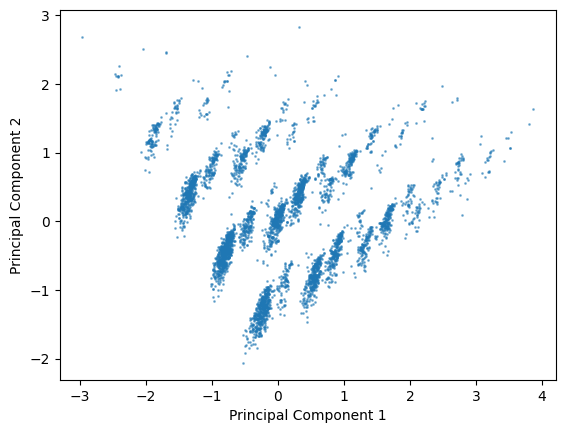

In [175]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook

# to be able to perform PCA we transform the 4707 observations of a 1D-array of
# length 12493 into a 2D-array of 4707*12493
x_overview = np.vstack(df["one_hot_overview"])
print(np.shape(x_overview))

# Set up PCA object
pca = PCA(n_components=2)  # Set the desired number of components
# Perform covariance matrix computation and eigendecomposition,
# and project data to lower dimension
overview_pca = pca.fit_transform(x_overview)

plt.scatter(overview_pca[:, 0], overview_pca[:, 1], alpha = 0.5, s = 1)
plt.title('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

We can identify about 4 different patterns of linear relationships between PC1 and PC2, as the (PC1, PC2) coordinates seem to cluster around on 4 straight lines with the same slopes but different intercepts.

You could also make the case that there's a pattern of about 20 clusters, as the (PC1, PC2) data points seem to be distributed across about 20 different ellipses

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [123]:
expl_variances = pca.explained_variance_ratio_

print("Variance captured by the first 2 Principal Components:", 100*(expl_variances[0] + expl_variances[1]), "%")
print("Loss of variance information in the 2D PCA projection:", 100* (1 - (expl_variances[0] + expl_variances[1])), "%")

Variance captured by the first 2 Principal Components: 11.28845086738353 %
Loss of variance information in the 2D PCA projection: 88.71154913261647 %


88.71 %

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

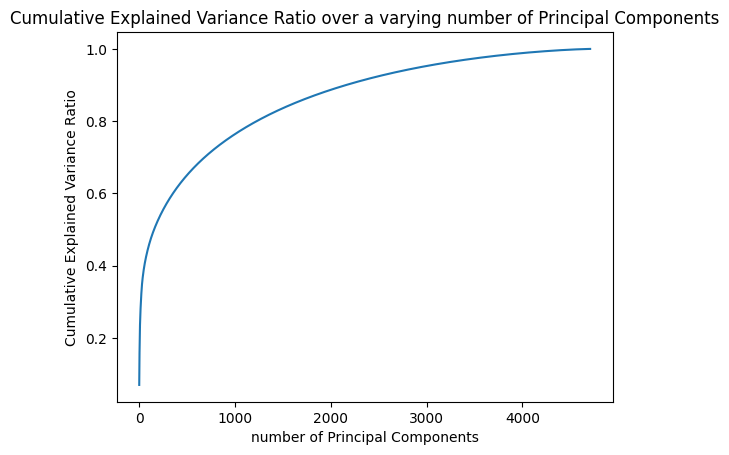

In [131]:
# Set up PCA object with the desired number of components
pca = PCA(n_components = min(len(df), len(vocab))) # the max number of possible PCs is the minimum of the vector of obs of 4707 and the vector of one-hot encodings of length 12493

# fit transform one_hot_overview encodings
labels_pca = pca.fit_transform(x_overview)
# get explained variance ratio from object, store it in a list
variances = pca.explained_variance_ratio_

plt.plot(np.cumsum(variances))
# set up y label, x label, title
plt.ylabel("Cumulative Explained Variance Ratio")
plt.xlabel("number of Principal Components")
plt.title("Cumulative Explained Variance Ratio over a varying number of Principal Components")
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [141]:
# your code answer here
var_expl_threshold = 0.8
for i in range(1, len(df) + 1):
  if np.cumsum(variances)[i-1] >= var_expl_threshold:
    print("Number of PCs we need:", i)
    break


Number of PCs we need: 1226


1226 principal components

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [149]:
n_dims = 1226
pca = PCA( n_components = n_dims)
labels_pca = pca.fit_transform(x_overview) # array of 4707 * n_dims

# transform each row into a list of length n_dims
one_hot_pca = []
one_hot_pca = labels_pca.tolist()

df["overview_pca"] = one_hot_pca
df["overview_pca"]

<ipython-input-149-7b8cc9adeeee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["overview_pca"] = one_hot_pca


0       [0.17130556275121656, 1.2545637565428696, 1.06...
1       [-0.37807293005886167, -1.593471849772127, 0.9...
2       [-1.9128810490622445, 1.176856261199035, 0.806...
3       [0.8229543741730835, -0.4484862837341812, 0.59...
4       [-0.10117960365984911, -0.22882078000631875, 0...
                              ...                        
4794    [-0.16452917101863823, -0.3582876078238496, 0....
4795    [0.43961685120778193, -1.13295788479938, 0.369...
4797    [0.3907208334792596, 0.5742052146671887, -0.26...
4798    [-0.30154466232943017, -1.1754163046978257, 0....
4799    [1.3368062836308507, -0.27275337575296016, 0.2...
Name: overview_pca, Length: 4707, dtype: object

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [152]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters = 20)
# fit model
kmeans.fit(overview_pca)

y_preds = kmeans.predict(overview_pca)# get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
df[df["cluster_kmeans"] == 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-152-8fbc2e757199>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_kmeans"] = y_preds # set predictions


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans
26,Captain America: Civil War,"Following the events of Age of Ultron, the col...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the events of age of ultron the coll...,47,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.0561619911622784, 1.128602963457777, -0.249...",0
36,Transformers: Age of Extinction,"As humanity picks up the pieces, following the...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",as humanity picks up the pieces following the ...,67,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.7130068666456637, 0.849125058775648, 0.0411...",0
108,Terminator Genisys,"The year is 2029. John Connor, leader of the r...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the year is 2029 john connor leader of the res...,55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.18010842627385, 0.8970335916826409, 0.55853...",0
123,The Matrix Revolutions,The human city of Zion defends itself against ...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the human city of zion defends itself against ...,31,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.7330884562680873, 0.8615803922907022, 0.035...",0
158,Star Trek,The fate of the galaxy rests in the hands of b...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the fate of the galaxy rests in the hands of b...,75,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.776566347167162, 0.9015926114957734, -0.122...",0
...,...,...,...,...,...,...,...,...,...,...
4192,In the Bedroom,"Summertime on the coast of Maine, ""In the Bedr...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",summertime on the coast of maine in the bedroo...,76,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.7784600752890327, 0.9782779329353634, -0.06...",0
4505,The Harvest (La Cosecha),The story of the children who work 12-14 hour ...,"[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",the story of the children who work 1214 hour d...,38,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.2330089868911824, 1.0242870848515746, 0.336...",0
4517,Wordplay,From the masters who create the mind-bending d...,"[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",from the masters who create the mindbending di...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.7619686631454146, 0.39003884242425585, 1.52...",0
4555,Alleluia! The Devil's Carnival,The Devil's Carnival: Alleluia! is the second ...,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 27, ""n...",Music,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the devils carnival alleluia is the second epi...,23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.1637026397992174, 0.8904678706413269, 0.562...",0


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

Based on the snippet above, the first cluster (cluster == 0) seems to consist of adventure / action movies such as Captain America, Star Trek, Terminator, The Matrix and Transformers which seem to go well together. However, this cluster also also consists of dramas, documentaries, and musicals, which do not really go together with the set of action/adventure movies. This indicates that clustering movies based on the first 15 words of the overview most likely does not yield very accurate results.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

There's not a clearly discernible elbow. I would proceed with a cluster size of 10.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

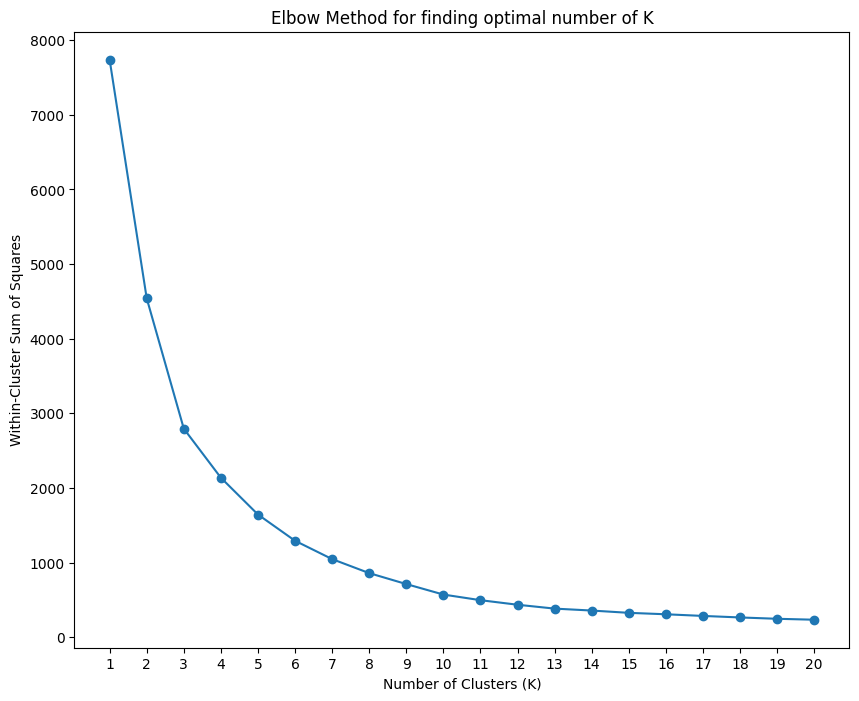

In [157]:
# your code answer here

# perform K-means clustering for different values of K
# find the best K by means of the elbow method

# we need to store the Within-cluster sum of squares for different values of K
wcss = []
for k in range(1, 20 + 1):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(overview_pca)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 20+1), wcss, marker = "o")
plt.ylabel("Within-Cluster Sum of Squares")
plt.xlabel("Number of Clusters (K)")
plt.xticks(range(1, 20 + 1))
plt.title("Elbow Method for finding optimal number of K")
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [158]:
# Your code answer here
# import GMM class
from sklearn.mixture import GaussianMixture

# perform GMM clustering
gmm = GaussianMixture(20)
gmm.fit(overview_pca)

predicted_clusters = gmm.predict(overview_pca)

df["cluster_gmm"] = predicted_clusters

df[df["cluster_gmm"] == 0] # the elements of cluster 0

<ipython-input-158-f0057a9dd3f3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_gmm"] = predicted_clusters


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm
13,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the texas rangers chase down a gang of outlaws...,68,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1033296941874913, 0.8713956947998338, 0.114...",4,0
55,Brave,Brave is set in the mystical Scottish Highland...,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",Animation,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",brave is set in the mystical scottish highland...,96,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.104751279435659, 0.9881280029827237, 0.0562...",4,0
56,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the uss enterprise crew explores the furthest ...,30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1095489160979048, 0.8904394862332351, 0.084...",4,0
59,2012,"Dr. Adrian Helmsley, part of a worldwide geoph...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",dr adrian helmsley part of a worldwide geophys...,107,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1275949257140852, 0.9308921341653154, 0.127...",4,0
81,Maleficent,The untold story of Disney's most iconic villa...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the untold story of disneys most iconic villai...,117,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1776896343799934, 0.9503770366030442, 0.106...",4,0
...,...,...,...,...,...,...,...,...,...,...,...
4652,The Christmas Bunny,The Christmas Bunny tells the story of a lonel...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10751, ""n...",Family,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",the christmas bunny tells the story of a lonel...,51,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1532542002706387, 0.9869519498834477, 0.073...",4,0
4728,Indie Game: The Movie,Indie Game: The Movie is a feature documentary...,"[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",indie game the movie is a feature documentary ...,140,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7590048953942935, 0.2905597044181889, -0.17...",10,0
4736,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the story of a 25 year old virgin girl looking...,27,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1428350572611214, 0.9376824283431099, 0.073...",4,0
4764,"Run, Hide, Die",On the anniversary weekend of the death of a y...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",on the anniversary weekend of the death of a y...,47,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3977039241538847, 1.2882164834182557, -0.11...",12,0


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

Based on the snippet above, this cluster consists of action / adventure movies that seem to go well together. On the other hand, it also consists of comedy and family movies (even a Christmas movie) that don't seem to go well together with beforementioned action / adventure movies, and especially not with the last 2 movies as those mention death and guns.

The GMM clustering seems to perform better than the K-means clustering, as there seems to be more general overlap, e.g. besides the action / adventure it also consists of thriller and Westerns, whereas for the K-means cluster there seems to be a split of action / adventure on one hand, and documentaries and dramas on the other.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

<Figure size 1000x800 with 0 Axes>

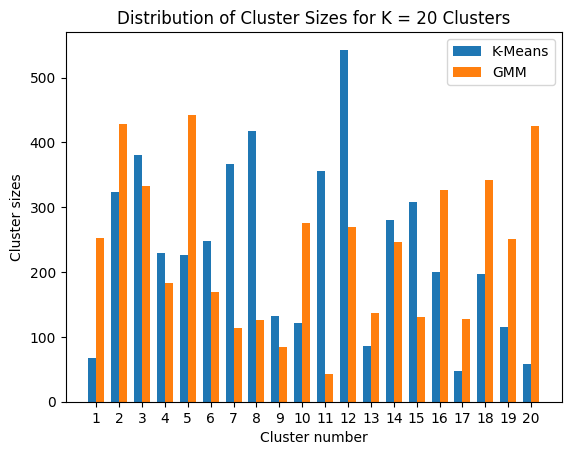

In [174]:
cluster_sizes_kmeans = df.value_counts(df["cluster_kmeans"]).sort_index()
cluster_sizes_gmm = df.value_counts(df["cluster_gmm"]).sort_index()

# Create an array for the x-axis positions
x = np.arange(1, 20 + 1)

plt.figure(figsize=(10, 8))
# Plotting the bars
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(x, cluster_sizes_kmeans, width=bar_width, label="K-Means") # size of the clusters for K-means clustering
bar2 = ax.bar(x+bar_width, cluster_sizes_gmm, width=bar_width, label="GMM") # size of the clusters for GMM clustering

# Add labels, title, and legend
ax.set_xlabel("Cluster number")
ax.set_ylabel("Cluster sizes")
ax.set_title("Distribution of Cluster Sizes for K = 20 Clusters")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(x)
ax.legend()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

There's a significant difference in the sizes of the clusters. The cluster sizes as a result of GMM clustering seem to be more uniform than those for K-Means clustering. This may be because GMM allows for more flexibility compared to K-means clustering, as K-means clustering leads to "hard" decision boundaries whereas GMM allows for "soft" decision boundaries based on probabilities.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [200]:
prev_watch = "Avatar"

cluster_kmeans = df.loc[df["title"] == prev_watch, "cluster_kmeans"].iloc[0] # find what cluster index Avatar falls into for k-means
cluster_gmm = df.loc[df["title"] == prev_watch, "cluster_gmm"].iloc[0] # find what cluster index Avatar falls into for gmm

# print out similar movies

print("Movie suggestions based on K-means clustering:")
print(df[df["cluster_kmeans"] == cluster_kmeans]["title"].tolist()[1:])

print()
print("Movie suggestions based on GMM clustering:")
print(df[df["cluster_gmm"] == cluster_gmm]["title"].tolist()[1:])



Movie suggestions based on K-means clustering:
['The Jungle Book', 'Angels & Demons', 'The Revenant', 'R.I.P.D.', 'Prometheus', 'Django Unchained', 'Cloud Atlas', 'The Fifth Element', 'Seventh Son', 'Safe House', 'Tower Heist', 'Memoirs of a Geisha', 'Shutter Island', 'Robots', 'The Siege', 'The Tale of Despereaux', 'Joy', 'Intolerable Cruelty', 'Leatherheads', 'The Pursuit of Happyness', 'Blade II', 'Basic', 'Star Trek: First Contact', 'Miss Congeniality', 'The Client', 'Galaxy Quest', 'Yours, Mine and Ours', 'Deep Rising', '17 Again', 'The Lincoln Lawyer', 'The Cell', 'Predator 2', 'Midnight in the Garden of Good and Evil', 'Premium Rush', 'The Order', 'Biutiful', 'Ponyo', 'The Longest Ride', 'Snow Dogs', 'Cradle Will Rock', 'The Grand Budapest Hotel', 'Arachnophobia', 'DodgeBall: A True Underdog Story', 'Midnight in Paris', 'Carrie', 'The Next Three Days', 'Pride and Glory', 'The Good Thief', 'Dawn of the Dead', 'Final Destination 2', 'The House Bunny', 'Half Past Dead', 'The Ruins'

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

Yes, they seem to return reasonable movie suggestions, particularly the GMM clustering, which suggests movies that can be described as a combination of fantasy and adventure, similarly to "Avatar".

**Q6.3** How would you try making the recommender systems better?

By searching for the *k* nearest neighbours within the clusters , i.e. finding the most similar movies by calculating the distances of each movie (within the cluster) to "Avatar" based on the overview_pca vectors, and then subsequently sorting them by distance. This allows us to find the *k* movies that are closest to the previous watched movie on the basis of the first 15 words used in the overview.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

By calculating the distance of each movie within the cluster of the previously watched movies (for computation purposes) to the previously wached movies, adding these distances, and sorting them according to nearest combined distance.  This allows us to find the movies that are closest (most similar) to the previously watched movies, and hence incorporate the info captured within historical behaviour into our suggestions.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [210]:
def cosine_sim(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    similarity = dot_product / (norm_v1 * norm_v2)

    return similarity

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df["title"] == prev_watch]["overview_pca"].iloc[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(row["overview_pca"], prev_watch_enc))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by = "cos_sim_to_avatar", ascending = False) # sort df
df.head() # print to verify

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275121656, 1.2545637565428696, 1.06...",8,8,1.000000
3363,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",a warlock flees from the 17th to the 20th cent...,122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14285163674543863, 1.1940360295715016, 1.00...",8,8,0.530979
3778,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",sam ellis is a man on the rise a hotshot feder...,48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.21497561521981423, 1.4085478017728457, 0.51...",16,8,0.473879
1285,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the nomad is a historical epic set in 18thcent...,39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2502330102123585, 1.4192751540293371, 0.331...",16,8,0.472834
415,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the future america is a dystopian wasteland...,87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2315206736194119, 1.4016470372924597, 0.356...",16,8,0.459112


Yes, this is better than the clustering methods, as the first few recommendations using cosine_similarity seem to be a combination of Action and Fantasy that are set in either the future or in a historical setting, and center around the adventures of one main character.


# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [211]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
# your code here: feel free to add extra cells

Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

In order to predict the genre from the overview, we are going to use the *overview_pca* as the predictor variables, which consist of the first 1226 principal components of the word vocabulary of the overviews which capture 80% of the variation, e.g. x_train consists of an array of 3795 (number of obs in training data) x 1226 (number of PCs = features). The response variable consists of the one-hot encoded genres *one_hot_genres* such that for y_train we have a 3795 * 21 (number of genres) array.

This boils down to a 21-class classification problem, for which we apply the supervised learning methods of Random Forest and Support Vector Machines, which we compare to the Logistic Regression that serves as a benchmark.  

For training these methods, we perform a 5-fold cross validation to ensure robustness. Furthermore for the Random Forest we need to tune 2 hyperparameters: the number of trees, and the depth of the tree. For the SVM we need to tune 4 hyperparameters: kernel type, C, degree and Gamma. For the hyperparameter tuning we set up a grid of combinations using GridSearchCV.

The performance of each the tuned RF and SVM models will then be evaluated by means of the accuracy on the test data.


# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)